Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков

In [ ]:
from pandas.core.algorithms import SelectNSeries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
water = pd.read_csv('water.csv', index_col=0)
water.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


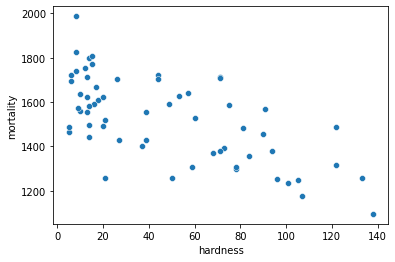

In [ ]:
sns.scatterplot(data=water, x='hardness', y='mortality')

# На визуализации просматривается обратная линейная взаимосвязь между жесткостью воды и смертностью
# Можно предположить, что чем выше жесткость воды тем ниже смертность

In [ ]:
# Коэф. корреляции Пирсена
water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
# Коэф. корреляции Спирмена
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = water[['hardness']]
y = water['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-3.13167087])

In [ ]:
model.intercept_

1668.9722977277095

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [ ]:
model.score(X_test, y_test)

0.5046490611017092

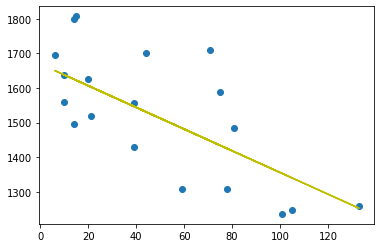

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='y')

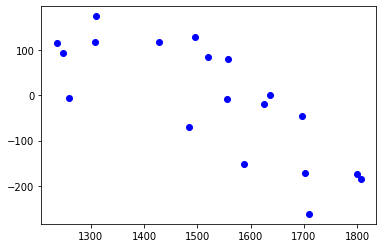

In [ ]:
# График остатков
plt.scatter(y_test, y_pred - y_test, c='b')

Вывод по модели:

Т.к. данных очень мало модель не показывает хороших результатов, но в целом можно предположить, что жесткость воды влияет на смертность обратно пропорционально, т.е. чем выше жесткость тем меньше смертность.

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [ ]:
south = water[water['location'] == 'South'].reset_index(drop=True)
south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,South,Birmingham,1466,5
2,South,Bournemouth,1299,78
3,South,Brighton,1359,84
4,South,Bristol,1392,73


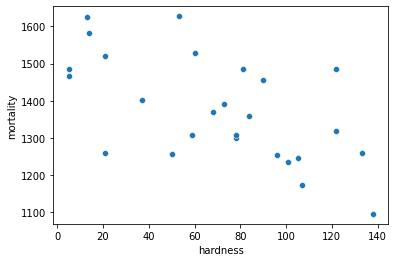

In [ ]:
sns.scatterplot(data=south, x='hardness', y='mortality')

In [ ]:
north = water[water['location'] == 'North'].reset_index(drop=True)
north.head()

,location,town,mortality,hardness
0,North,Birkenhead,1668,17
1,North,Blackburn,1800,14
2,North,Blackpool,1609,18
3,North,Bolton,1558,10
4,North,Bootle,1807,15


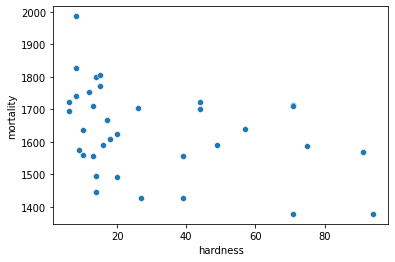

In [ ]:
sns.scatterplot(data=north, x='hardness', y='mortality')

In [ ]:
print(f"Коэф. корреляции Пирсена:\n {south[['hardness', 'mortality']].corr()}", end='\n\n')
print(f"Коэф. корреляции Спирмена:\n {south[['hardness', 'mortality']].corr(method='spearman')}")

Коэф. корреляции Пирсена:
            hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000

Коэф. корреляции Спирмена:
            hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


In [ ]:
print(f"Коэф. корреляции Пирсена:\n {north[['hardness', 'mortality']].corr()}", end='\n\n')
print(f"Коэф. корреляции Спирмена:\n {north[['hardness', 'mortality']].corr(method='spearman')}")

Коэф. корреляции Пирсена:
            hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000

Коэф. корреляции Спирмена:
            hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


In [ ]:
X_north = north[['hardness']]
y_north = north['mortality']

In [ ]:
X_south = south[['hardness']]
y_south = south['mortality']

In [ ]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_north, y_north, test_size=0.30, random_state=42)


In [ ]:
model_n = model.fit(X_train_n, y_train_n)

In [ ]:
print(model_n.coef_[0])
print(model_n.intercept_)

-1.976862260063824
1688.150229031281


In [ ]:
y_pred_n = model_n.predict(X_test_n)
y_pred_n

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [ ]:
model_n.score(X_test_n, y_test_n)

0.018885304285745863

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


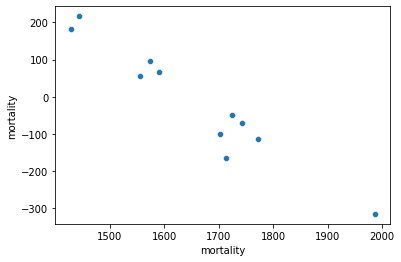

In [ ]:
# График остатков
sns.scatterplot(y_test_n, y_pred_n - y_test_n)

# Прослеживается закономерность, линейная регрессия скорее всего не подходит + очень мало данных

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_south, y_south, test_size=0.30, random_state=42)

In [ ]:
model_s = model.fit(X_train_s, y_train_s)

In [ ]:
print(model_s.coef_[0])
print(model_s.intercept_)

-3.513429212378231
1640.2204603423374


In [ ]:
y_pred_s = model_s.predict(X_test_s)
y_pred_s

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [ ]:
model_s.score(X_test_s, y_test_s)

-2.5519223012352077

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


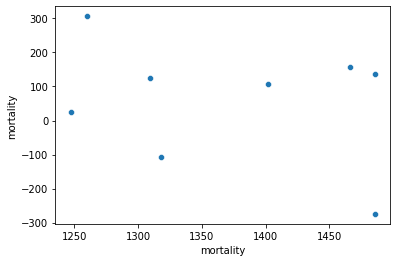

In [ ]:
# График остатков
sns.scatterplot(y_test_s, y_pred_s - y_test_s)

# Отрицательный коэф. детерминации скорее всего означает очень малое количество данных + возможно нелинейный характер данных, хотя остатки распределены хаотично